In [28]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [29]:
# importing csv
df = pd.read_csv("C:/Users/ankit/Downloads/Energy power plant/pjm_hourly_est.csv")

In [30]:
# reading head
df.head()

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
0,31-12-1998 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0
1,31-12-1998 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0
2,31-12-1998 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0
3,31-12-1998 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0
4,31-12-1998 05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178262 entries, 0 to 178261
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  178262 non-null  object 
 1   AEP       121273 non-null  float64
 2   COMED     66497 non-null   float64
 3   DAYTON    121275 non-null  float64
 4   DEOK      57739 non-null   float64
 5   DOM       116189 non-null  float64
 6   DUQ       119068 non-null  float64
 7   EKPC      45334 non-null   float64
 8   FE        62874 non-null   float64
 9   NI        58450 non-null   float64
 10  PJME      145366 non-null  float64
 11  PJMW      143206 non-null  float64
 12  PJM_Load  32896 non-null   float64
dtypes: float64(12), object(1)
memory usage: 17.7+ MB


In [32]:
# changing to date format 
df['Datetime'] = pd.to_datetime(df['Datetime'])

C:\Users\ankit\AppData\Local\Temp\ipykernel_18416\1611413796.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Datetime'])


In [33]:
# making date as index
df.set_index('Datetime', inplace=True)

In [34]:
df.head()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
Datetime,,,,,,,,,,,,
1998-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0
1998-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0
1998-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0
1998-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0
1998-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0


In [35]:
# Resampling for better charts and insights

# Daily resampling = energy consumption per day
df_daily = df.resample('D').mean()

# Weekly resampling
df_weekly = df.resample('W').mean()

# Monthly resampling
df_monthly = df.resample('M').mean()

display(df_weekly.head())

# Check dataset shapes
print("Original Data Shape:", df.shape)
print("Daily:", df_daily.shape)
print("Weekly:", df_weekly.shape)
print("Monthly:", df_monthly.shape)


,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
Datetime,,,,,,,,,,,,
1998-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25612.669492
1998-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25318.452381
1998-04-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25191.505952
1998-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25139.095238
1998-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25194.898810


Original Data Shape: (178262, 12)
Daily: (7430, 12)
Weekly: (1062, 12)
Monthly: (245, 12)


In [36]:
 #Feature Engineering
# Extracting time-based features
df_daily['Year'] = df_daily.index.year
df_daily['Month'] = df_daily.index.month
df_daily['Day'] = df_daily.index.day
df_daily['Weekday'] = df_daily.index.weekday  # Monday = 0, Sunday = 6
df_daily['Is_Weekend'] = df_daily['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Display first few rows after feature engineering
display(df_daily.head())

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load,Year,Month,Day,Weekday,Is_Weekend
Datetime,,,,,,,,,,,,,,,,,
1998-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27813.739130,1998,4,1,2,0
1998-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26605.791667,1998,4,2,3,0
1998-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25672.333333,1998,4,3,4,0
1998-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24487.083333,1998,4,4,5,1
1998-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23487.565217,1998,4,5,6,1


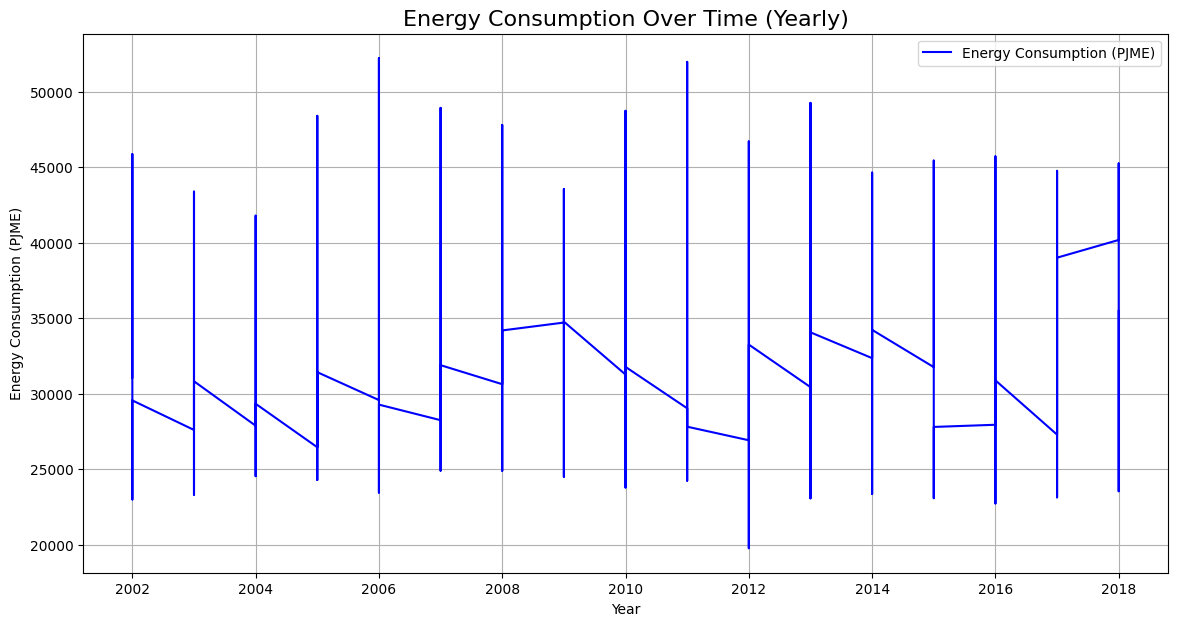

In [37]:
# EDA
# Plotting energy consumption by Year, Month, Day
plt.figure(figsize=(14, 7))
plt.plot(df_daily['Year'], df_daily['PJME'], label='Energy Consumption (PJME)', color='blue')
plt.title('Energy Consumption Over Time (Yearly)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Energy Consumption (PJME)')
plt.legend()
plt.grid(True)
plt.show()



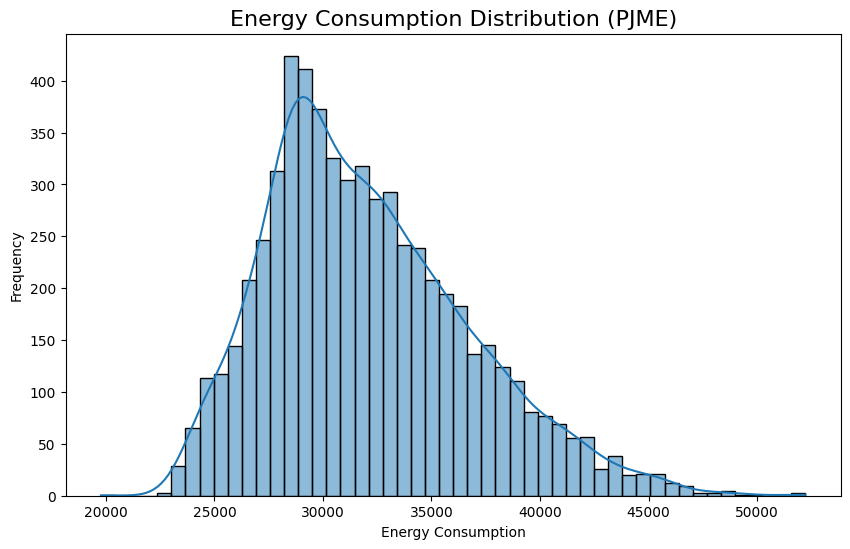

In [38]:
# Plotting the distribution of energy consumption
plt.figure(figsize=(10, 6))
sns.histplot(df_daily['PJME'], bins=50, kde=True)
plt.title('Energy Consumption Distribution (PJME)', fontsize=16)
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.show()

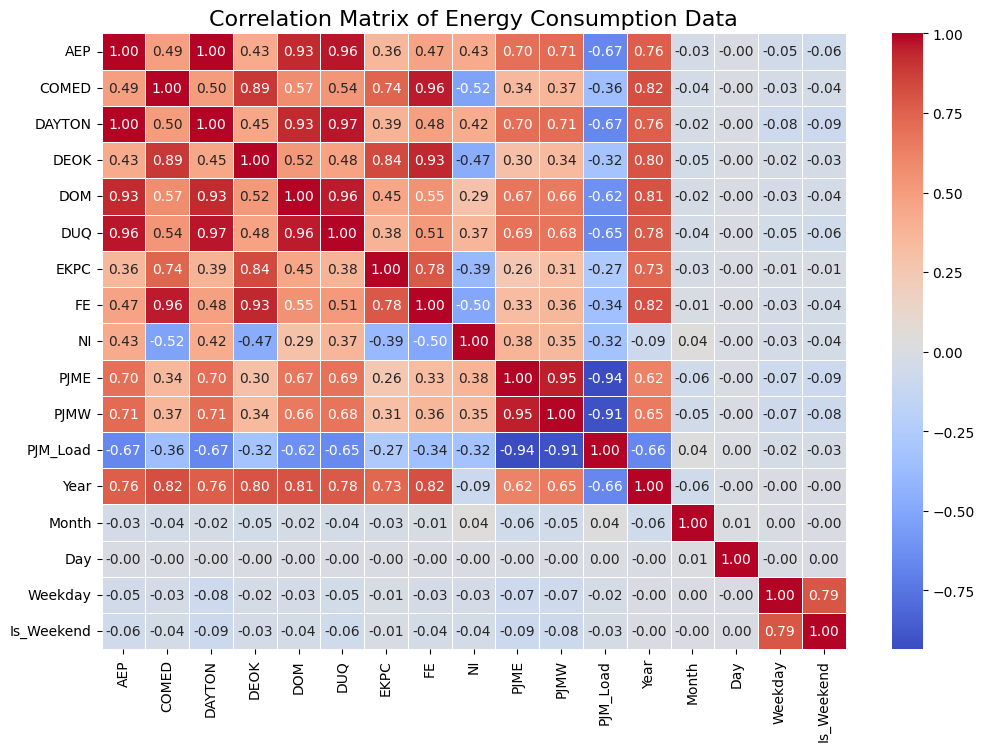

In [39]:
# Correlation matrix
df_daily.fillna(0, inplace=True)
plt.figure(figsize=(12, 8))
sns.heatmap(df_daily.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Energy Consumption Data', fontsize=16)
plt.show()

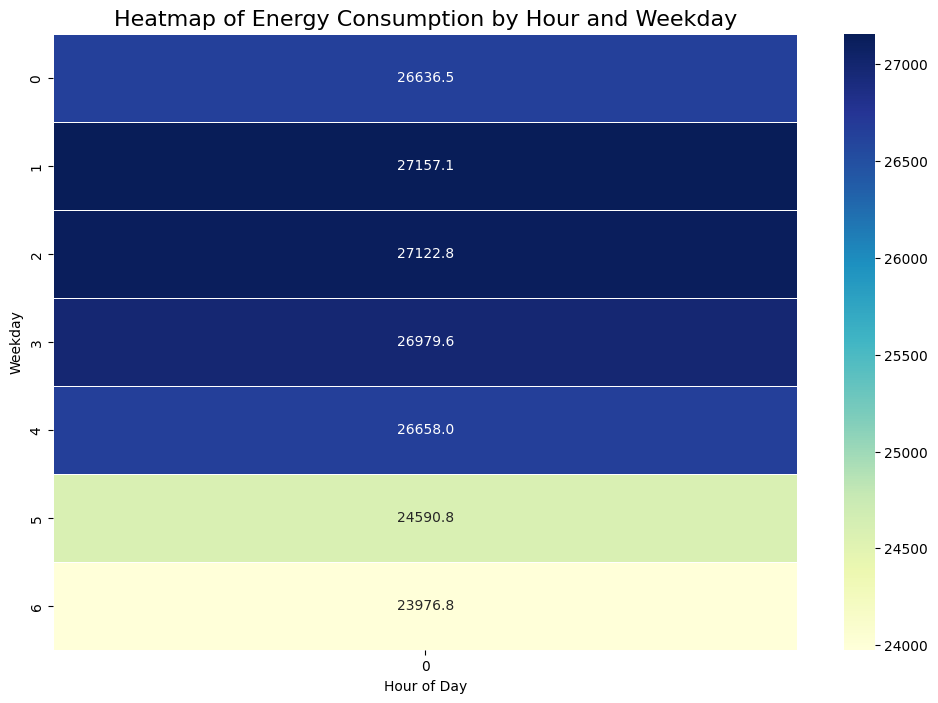

In [40]:
# Heatmap of energy consumption by day and hour
df_daily['Hour'] = df_daily.index.hour
heatmap_data = df_daily.pivot_table(values='PJME', index='Weekday', columns='Hour', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)
plt.title('Heatmap of Energy Consumption by Hour and Weekday', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Weekday')
plt.show()

## Check for stationarity using ADF test

In [41]:
adf_result = adfuller(df_daily['PJME'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -3.0592343475337973
p-value: 0.029720844229852376


## ARIMA MODEL

In [42]:
arima_model = ARIMA(df_daily['PJME'], order=(1, 1, 1))
model_fitted = arima_model.fit()

In [43]:
# forcasting future values
forecast_steps = 30
forecast = model_fitted.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df_daily.index[-1], periods=forecast_steps+1, freq='D')[1:]

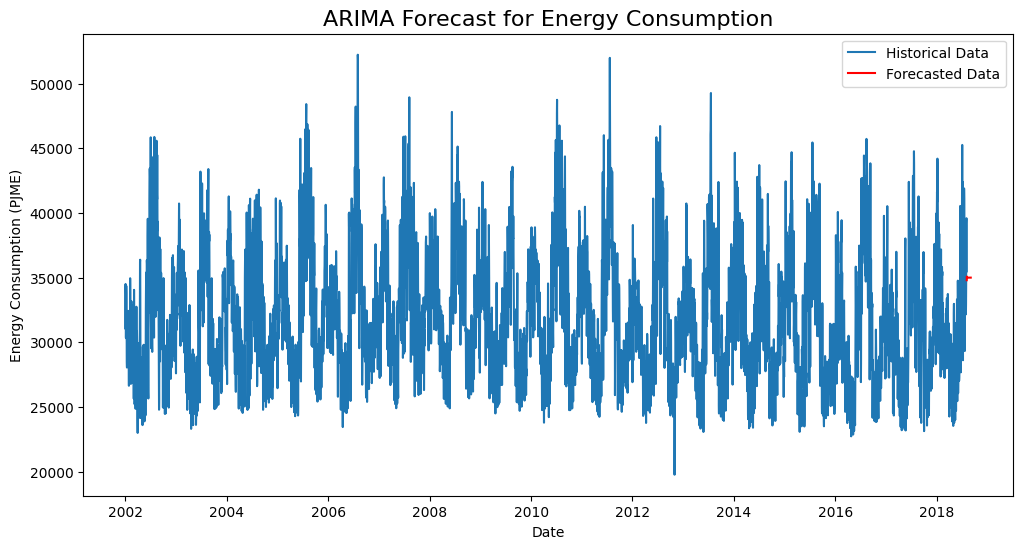

Forecasted Values for the next 30 days:
2018-08-04    34802.891007
2018-08-05    35083.971430
2018-08-06    34968.314624
2018-08-07    35015.904195
2018-08-08    34996.322405
2018-08-09    35004.379769
2018-08-10    35001.064387
2018-08-11    35002.428575
2018-08-12    35001.867249
2018-08-13    35002.098219
2018-08-14    35002.003182
2018-08-15    35002.042287
2018-08-16    35002.026196
2018-08-17    35002.032817
2018-08-18    35002.030093
2018-08-19    35002.031214
2018-08-20    35002.030753
2018-08-21    35002.030942
2018-08-22    35002.030864
2018-08-23    35002.030896
2018-08-24    35002.030883
2018-08-25    35002.030889
2018-08-26    35002.030886
2018-08-27    35002.030887
2018-08-28    35002.030887
2018-08-29    35002.030887
2018-08-30    35002.030887
2018-08-31    35002.030887
2018-09-01    35002.030887
2018-09-02    35002.030887
Freq: D, Name: predicted_mean, dtype: float64


 Average Forecasted Values for the next 30 days:
34997.3279990588


In [44]:
# plot forcasting values
df_daily.replace(0, np.nan, inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily['PJME'], label='Historical Data')
plt.plot(forecast_index, forecast, label='Forecasted Data', color='red')
plt.title('ARIMA Forecast for Energy Consumption', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Energy Consumption (PJME)')
plt.legend()
plt.show()
print("Forecasted Values for the next 30 days:")
print(forecast)
print("\n")
print(" Average Forecasted Values for the next 30 days:")
print(np.mean(forecast))

In [45]:
# model performance
df_daily.fillna(0, inplace=True)
train_forecast = model_fitted.predict(start=0, end=len(df_daily)-1)
rmse = np.sqrt(mean_squared_error(df_daily['PJME'], train_forecast))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 2157.7884565149625


In [46]:
# Predict values for training data
train_forecast = model_fitted.predict(start=0, end=len(df_daily)-1)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(df_daily['PJME'], train_forecast))

# Calculate MAE
mae = mean_absolute_error(df_daily['PJME'], train_forecast)

# Calculate MAPE
mape = np.mean(np.abs((df_daily['PJME'] - train_forecast) / df_daily['PJME'])) * 100

# Print the accuracy metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Root Mean Squared Error (RMSE): 2157.7884565149625
Mean Absolute Error (MAE): 1440.9150542231625
Mean Absolute Percentage Error (MAPE): 5.50%


## 
RMSE = 2157.79

The model's average prediction error is ~2157.79 energy units.

Lower is better, but whether this is good depends on the data scale.

MAE = 1440.92

The model's average absolute error is ~1440.92 energy units.

Less sensitive to large errors compared to RMSE.

MAPE = 5.50%

The model’s error is 5.5% on average, which is excellent (below 10%).

This means the model’s predictions are quite accurate.

In [51]:
dashboard => prediction chart => 
accuracy and hyper parameter tunning

SyntaxError: invalid syntax (108508503.py, line 1)

In [52]:

forecast_df = pd.DataFrame({'Datetime': forecast_index, 'Forecasted_PJME': forecast.values})

df_export = df_daily.copy()
df_export.reset_index(inplace=True)

df_export = pd.concat([df_export, forecast_df], ignore_index=True)
df_export.to_csv("energy_forecast.csv", index=False)


In [53]:
df_daily.to_csv("df_daily.csv", index=True)


In [55]:
df_export.columns

Index(['Datetime', 'AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'EKPC',
       'FE', 'NI', 'PJME', 'PJMW', 'PJM_Load', 'Year', 'Month', 'Day',
       'Weekday', 'Is_Weekend', 'Hour', 'Forecasted_PJME'],
      dtype='object')